# multipBootstrap
This function computes a confidence band for the average landscape (or the average silhouette)
using the multiplier bootstrap.

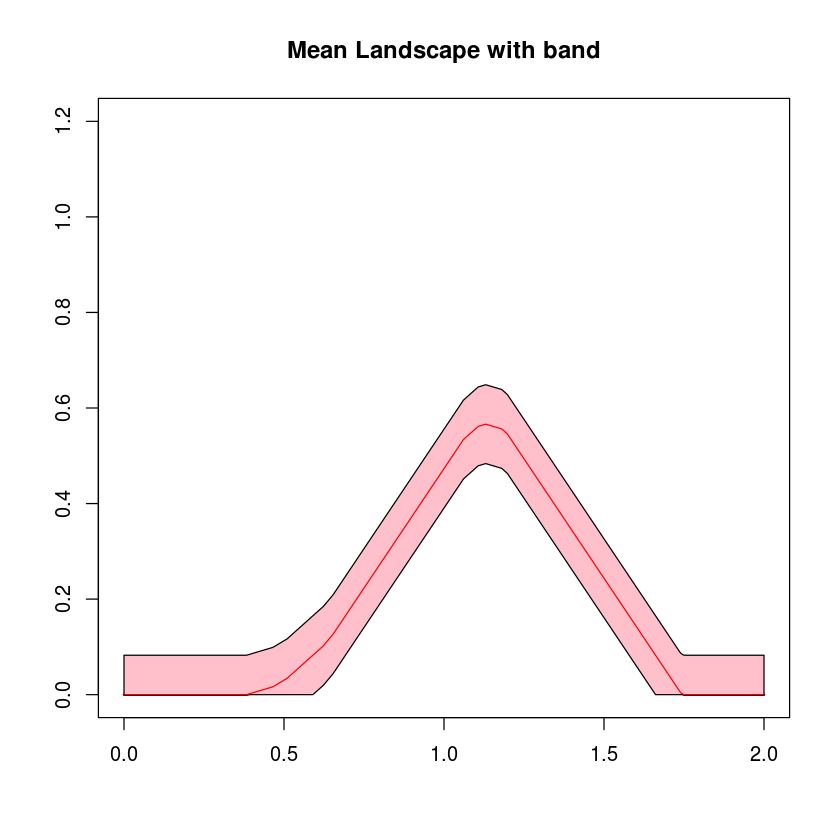

In [1]:
library(TDA)

nn <- 3000 #large sample size
mm <- 50 #small subsample size
NN <- 5 #we will compute NN diagrams using subsamples of size mm
XX <- circleUnif(nn) ## large sample from the unit circle

DiagLim <- 2
maxdimension <- 1
tseq <- seq(0, DiagLim, length = 1000)
Diags <- list() #here we will store the NN rips diagrams

#constructed using different subsamples of mm points
#here we'll store the landscapes
Lands <- matrix(0, nrow = NN, ncol = length(tseq))
for (i in seq_len(NN)){
subXX <- XX[sample(seq_len(nn), mm), ]
Diags[[i]] <- ripsDiag(subXX, maxdimension, DiagLim)
Lands[i, ] <- landscape(Diags[[i]][["diagram"]], dimension = 1, KK = 1, tseq)
}

## now we use the NN landscapes to construct a confidence band
B <- 50
alpha <- 0.05
boot <- multipBootstrap(Lands, B, alpha)

LOWband <- boot[["band"]][, 1]
UPband <- boot[["band"]][, 2]
MeanLand <- boot[["mean"]]

plot(tseq, MeanLand, type = "l", lwd = 2, xlab = "", ylab = "",
    main = "Mean Landscape with band", ylim = c(0, 1.2))
polygon(c(tseq, rev(tseq)), c(LOWband, rev(UPband)), col = "pink")
lines(tseq, MeanLand, lwd = 1, col = 2)